EDA - Along these lines, there are several essential aspects that must be addressed in any Exploratory Data Analysis and we will take it as a starting point to evaluate your performance in this section. These highlights include: searching for missing values, outliers, and duplicate records. Likewise, the use of consistent graphs according to the corresponding variable typology is essential.

In [30]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import datetime



In [32]:
# Load the Excel file
file_path = ('./homicidios.xlsx')
all_sheets = pd.read_excel(file_path, sheet_name=None)


In [33]:
import copy
copied_sheets = copy.deepcopy(all_sheets)


In [34]:
# Print all sheet names to check the exact names
print(list(copied_sheets.keys()))


['HECHOS', 'VICTIMAS']


In [35]:
df_hechos = copied_sheets['HECHOS']  # DataFrame for the sheet named "Hechos"
df_victimas = copied_sheets['VICTIMAS']  # DataFrame for the sheet named "Victimas"


In [36]:
df_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [37]:
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


Prepare data for analysis. 

Data preparation for Hechos dataframe

In [38]:
# Display data types and other info for df_hechos
print("DataFrame Info for df_hechos:")
df_hechos.info()

DataFrame Info for df_hechos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-nul

Create a new column 'PERIODO' to categorize time of day

In [39]:
# Convert 'HORA' column to datetime format with error handling
df_hechos['HORA'] = pd.to_datetime(df_hechos['HORA'], format='%H:%M:%S', errors='coerce')

# Filter out missing values (NaT) in the 'HORA' column using boolean indexing
df_hechos = df_hechos[~df_hechos['HORA'].isna()]

# Define the dividing lines for time categories
time_divisions = {
    'Mañana': (pd.to_datetime('05:00:00').time(), pd.to_datetime('09:59:59').time()),
    'Mediodía': (pd.to_datetime('10:00:00').time(), pd.to_datetime('14:59:59').time()),
    'Tarde': (pd.to_datetime('15:00:00').time(), pd.to_datetime('16:59:59').time()),
    'Noche': (pd.to_datetime('17:00:00').time(), pd.to_datetime('20:59:59').time()),
    'Madrugada': (pd.to_datetime('21:00:00').time(), pd.to_datetime('23:59:59').time())  # Hasta la medianoche
}

# Function to categorize time into periods
def categorize_time(hour):
    for period, (start, end) in time_divisions.items():
        if start <= hour.time() <= end:
            return period
    # If the hour is between midnight and 5:00 AM, consider it as Madrugada
    return 'Madrugada'

# Add a new column 'PERIODO' with categorized time
df_hechos['PERIODO'] = df_hechos['HORA'].apply(categorize_time)

# Display the DataFrame with the new column
print(df_hechos)


            ID  N_VICTIMAS      FECHA  AAAA  MM  DD                HORA  HH  \
0    2016-0001           1 2016-01-01  2016   1   1 1900-01-01 04:00:00   4   
1    2016-0002           1 2016-01-02  2016   1   2 1900-01-01 01:15:00   1   
2    2016-0003           1 2016-01-03  2016   1   3 1900-01-01 07:00:00   7   
3    2016-0004           1 2016-01-10  2016   1  10 1900-01-01 00:00:00   0   
4    2016-0005           1 2016-01-21  2016   1  21 1900-01-01 05:20:00   5   
..         ...         ...        ...   ...  ..  ..                 ...  ..   
691  2021-0093           1 2021-12-13  2021  12  13 1900-01-01 17:10:00  17   
692  2021-0094           1 2021-12-20  2021  12  20 1900-01-01 01:10:00   1   
693  2021-0095           1 2021-12-30  2021  12  30 1900-01-01 00:43:00   0   
694  2021-0096           1 2021-12-15  2021  12  15 1900-01-01 10:30:00  10   
695  2021-0097           1 2021-11-18  2021  11  18 1900-01-01 06:10:00   6   

                               LUGAR_DEL_HECHO TIPO

C:\Users\Owner\AppData\Local\Temp\ipykernel_14408\1896942636.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hechos['PERIODO'] = df_hechos['HORA'].apply(categorize_time)


Check for missing values/nulls

In [40]:
# Sum of null values in each column for df_hechos
null_counts_hechos = df_hechos.isnull().sum()
print("Null values in each column of df_hechos:")
print(null_counts_hechos)

Null values in each column of df_hechos:
ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   566
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
PERIODO                    0
dtype: int64


Av General Paz is best defined as an autopista due to its characteristics. Replacing GRAL PAZ with AVENIDA.

In [41]:
# Replace 'GRAL PAZ' with 'AUTOPISTA' in the TIPO_DE_CALLE column
df_hechos['TIPO_DE_CALLE'] = df_hechos['TIPO_DE_CALLE'].replace('GRAL PAZ', 'AUTOPISTA')

# Verify the change by checking the unique values in the TIPO_DE_CALLE column
print(df_hechos['TIPO_DE_CALLE'].unique())


['AVENIDA' 'AUTOPISTA' 'CALLE']


C:\Users\Owner\AppData\Local\Temp\ipykernel_14408\1145279493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hechos['TIPO_DE_CALLE'] = df_hechos['TIPO_DE_CALLE'].replace('GRAL PAZ', 'AUTOPISTA')


Data preparation for the victimas dataframe

In [42]:
# Display data types and other info for df_victimas
print("DataFrame Info for df_victimas:")
df_victimas.info()

DataFrame Info for df_victimas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Check to see if FECHA and FECHA_FALLECIMIENTO has consistent pattern before changing

In [43]:
# Convert both columns to datetime format, if not already done
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'], errors='coerce')
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')

# Check if all time components are zero (midnight) for both columns
all_zeros_FECHA = df_victimas['FECHA'].apply(lambda x: x is not pd.NaT and x.time() == datetime.time(0, 0, 0))
all_zeros_FECHA_FALLECIMIENTO = df_victimas['FECHA_FALLECIMIENTO'].apply(lambda x: x is not pd.NaT and x.time() == datetime.time(0, 0, 0))

# Verify if all entries have the zero time component
all_match_FECHA = all_zeros_FECHA.all()
all_match_FECHA_FALLECIMIENTO = all_zeros_FECHA_FALLECIMIENTO.all()

print("All FECHA entries match the 'empty time' pattern:", all_match_FECHA)
print("All FECHA_FALLECIMIENTO entries match the 'empty time' pattern:", all_match_FECHA_FALLECIMIENTO)


All FECHA entries match the 'empty time' pattern: True
All FECHA_FALLECIMIENTO entries match the 'empty time' pattern: False


In [44]:
# Replace 'SD' with NaN to handle it as a missing value
df_victimas['FECHA_FALLECIMIENTO'].replace('SD', np.nan, inplace=True)

# Convert the column to datetime format, handling errors by coercing them to NaT (missing datetime)
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')

# Filter to find entries that do not match the midnight time component
non_midnight_entries = df_victimas[df_victimas['FECHA_FALLECIMIENTO'].notna() & 
                                   (df_victimas['FECHA_FALLECIMIENTO'].dt.time != datetime.time(0, 0, 0))]

# Display these entries to inspect them
print("Entries that do not conform to the midnight datetime pattern:")
print(non_midnight_entries)


Entries that do not conform to the midnight datetime pattern:
Empty DataFrame
Columns: [ID_hecho, FECHA, AAAA, MM, DD, ROL, VICTIMA, SEXO, EDAD, FECHA_FALLECIMIENTO]
Index: []


All time is set to midnight, which isn't useful. Dropping time, leaving date in both columns 

In [45]:
# Assuming all entries for both datetime columns are confirmed to be at midnight
df_victimas['FECHA'] = df_victimas['FECHA'].dt.date
df_victimas['FECHA_FALLECIMIENTO'] = df_victimas['FECHA_FALLECIMIENTO'].dt.date

# Check the first few entries to confirm the changes
print(df_victimas[['FECHA', 'FECHA_FALLECIMIENTO']].head())


        FECHA FECHA_FALLECIMIENTO
0  2016-01-01          2016-01-01
1  2016-01-02          2016-01-02
2  2016-01-03          2016-01-03
3  2016-01-10                 NaT
4  2016-01-21          2016-02-01


In [46]:
# First, let's ensure both columns are in datetime format
try:
    df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'], errors='coerce')
    df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')
    print("Columns converted to datetime.")
except Exception as e:
    print("Error converting columns to datetime:", e)

# Now, check if conversion was successful and drop the time component
try:
    df_victimas['FECHA'] = df_victimas['FECHA'].dt.date
    df_victimas['FECHA_FALLECIMIENTO'] = df_victimas['FECHA_FALLECIMIENTO'].dt.date
    print("Time components dropped, only dates retained.")
except AttributeError:
    print("Failed to drop time components. Columns might not be datetime.")

# Display the first few entries to confirm the changes
print(df_victimas[['FECHA', 'FECHA_FALLECIMIENTO']].head())

Columns converted to datetime.
Time components dropped, only dates retained.
        FECHA FECHA_FALLECIMIENTO
0  2016-01-01          2016-01-01
1  2016-01-02          2016-01-02
2  2016-01-03          2016-01-03
3  2016-01-10                 NaT
4  2016-01-21          2016-02-01


Now I want to focus on the categorical data. How many categories are in each column, and how many instances of each category?

In [47]:
# Assuming df_victimas is your DataFrame

# Get unique entries and their counts for 'ROL'
rol_counts = df_victimas['ROL'].value_counts()
print("Counts for ROL:")
print(rol_counts)

# Get unique entries and their counts for 'VICTIMA'
victima_counts = df_victimas['VICTIMA'].value_counts()
print("\nCounts for VICTIMA:")
print(victima_counts)

# Get unique entries and their counts for 'SEXO'
sexo_counts = df_victimas['SEXO'].value_counts()
print("\nCounts for SEXO:")
print(sexo_counts)

# Get unique entries and their counts for 'EDAD'
edad_counts = df_victimas['EDAD'].value_counts()
print("\nCounts for EDAD:")
print(edad_counts)


Counts for ROL:
ROL
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: count, dtype: int64

Counts for VICTIMA:
VICTIMA
MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
SD             9
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64

Counts for SEXO:
SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

Counts for EDAD:
EDAD
SD    53
30    28
29    24
23    24
27    20
      ..
11     1
13     1
85     1
7      1
88     1
Name: count, Length: 86, dtype: int64


'PASAJERO_ACOMPAÑANTE' in ROL column is redundant and overly specific. 'PASAJEROS' in VICTIMA column doesn't necessarily imply multiple victims, so it is opaque. Changing to both to PASAJERO

In [48]:
# Replace 'PASAJERO_ACOMPAÑANTE' with 'PASAJERO' in the 'ROL' column
df_victimas['ROL'] = df_victimas['ROL'].str.replace('PASAJERO_ACOMPAÑANTE', 'PASAJERO')

# Replace 'PASAJEROS' with 'PASAJERO' in the 'VICTIMA' column
df_victimas['VICTIMA'] = df_victimas['VICTIMA'].str.replace('PASAJEROS', 'PASAJERO')

# Check if the replacements were successful
print("Unique entries in 'ROL':", df_victimas['ROL'].unique())
print("Unique entries in 'VICTIMA':", df_victimas['VICTIMA'].unique())



Unique entries in 'ROL': ['CONDUCTOR' 'PASAJERO' 'PEATON' 'SD' 'CICLISTA']
Unique entries in 'VICTIMA': ['MOTO' 'AUTO' 'PEATON' 'SD' 'CARGAS' 'BICICLETA' 'PASAJERO' 'MOVIL']


Check for missing values/nulls

In [49]:
# Sum of null values in each column for df_victimas
null_counts_victimas = df_victimas.isnull().sum()
print("Null values in each column of df_victimas:")
print(null_counts_victimas)

Null values in each column of df_victimas:
ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                     0
VICTIMA                 0
SEXO                    0
EDAD                    0
FECHA_FALLECIMIENTO    68
dtype: int64


Check for duplicates

In [50]:
# Check for duplicates in the 'ID' column of df_hechos
duplicates_hechos = df_hechos.duplicated(subset='ID', keep=False)  # 'keep=False' marks all duplicates as True

# To see the duplicated rows based on 'ID'
duplicated_rows_hechos = df_hechos[duplicates_hechos]

# Count of duplicate entries
count_duplicates_hechos = duplicates_hechos.sum()
print("Number of duplicate entries in 'ID' column of df_hechos:", count_duplicates_hechos)
print(duplicated_rows_hechos)


Number of duplicate entries in 'ID' column of df_hechos: 0
Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Altura, Cruce, Dirección Normalizada, COMUNA, XY (CABA), pos x, pos y, PARTICIPANTES, VICTIMA, ACUSADO, PERIODO]
Index: []

[0 rows x 22 columns]


It makes sense that there would be duplicated entries for some ID_hecho rows...these are single accidents that resulted in multiple fatalities

In [51]:
# Check for duplicates in the 'ID_hechos' column of df_victimas
duplicates_victimas = df_victimas.duplicated(subset='ID_hecho', keep=False)  # 'keep=False' marks all duplicates as True

# To see the duplicated rows based on 'ID_hechos'
duplicated_rows_victimas = df_victimas[duplicates_victimas]

# Count of duplicate entries
count_duplicates_victimas = duplicates_victimas.sum()
print("Number of duplicate entries in 'ID_hechos' column of df_victimas:", count_duplicates_victimas)
print(duplicated_rows_victimas)


Number of duplicate entries in 'ID_hechos' column of df_victimas: 41
      ID_hecho       FECHA  AAAA  MM  DD        ROL VICTIMA       SEXO EDAD  \
29   2016-0041  2016-03-29  2016   3  29  CONDUCTOR    MOTO  MASCULINO   54   
30   2016-0041  2016-03-29  2016   3  29   PASAJERO    MOTO  MASCULINO   SD   
98   2016-0126  2016-09-18  2016   9  18  CONDUCTOR    AUTO  MASCULINO   37   
99   2016-0126  2016-09-18  2016   9  18   PASAJERO    AUTO  MASCULINO   60   
163  2017-0026  2017-02-26  2017   2  26   PASAJERO    AUTO   FEMENINO   23   
164  2017-0026  2017-02-26  2017   2  26  CONDUCTOR    AUTO  MASCULINO   19   
173  2017-0035  2017-03-23  2017   3  23  CONDUCTOR    AUTO  MASCULINO   28   
174  2017-0035  2017-03-23  2017   3  23   PASAJERO    AUTO  MASCULINO   32   
175  2017-0035  2017-03-23  2017   3  23   PASAJERO    AUTO  MASCULINO   30   
176  2017-0036  2017-03-29  2017   3  29   PASAJERO    MOTO   FEMENINO   SD   
177  2017-0036  2017-03-29  2017   3  29  CONDUCTOR    MOTO  M

Each value is unique, but there is no unique identifier for each victim. Fixing that by creating a unit ID_victimas column.

In [52]:
# Sort by 'id' just in case
df_victimas = df_victimas.sort_values(by='ID_hecho')

# Create a unique identifier for each victim
df_victimas['victim_count'] = df_victimas.groupby('ID_hecho').cumcount() + 1  # starts counting from 1
df_victimas['ID_victimas'] = df_victimas['ID_hecho'].astype(str) + '_' + df_victimas['victim_count'].astype(str)

# Move 'id_victimas' column to the first position
cols = list(df_victimas.columns)
cols.insert(0, cols.pop(cols.index('ID_victimas')))
df_victimas = df_victimas[cols]

#Accidentaly created two columns, removing mistake

#See victim numbers sharing same ID_hecho, so filter for rows where the same accident 'id' appears more than once
multi_victim_accidents = df_victimas.groupby('ID_victimas').filter(lambda x: len(x) > 1)

# Print these instances
print(multi_victim_accidents)

Empty DataFrame
Columns: [ID_victimas, ID_hecho, FECHA, AAAA, MM, DD, ROL, VICTIMA, SEXO, EDAD, FECHA_FALLECIMIENTO, victim_count]
Index: []


In [53]:
# Drop the column 'id_victimas' from df_victimas
df_victimas.drop('id_victimas', axis=1, inplace=True)

# Verify the column is removed by printing the DataFrame columns
print(df_victimas.columns)


KeyError: "['id_victimas'] not found in axis"

In [54]:
print(df_victimas.head())
print(df_victimas['ID_victimas'].value_counts())


   ID_victimas   ID_hecho       FECHA  AAAA  MM  DD        ROL VICTIMA  \
0  2016-0001_1  2016-0001  2016-01-01  2016   1   1  CONDUCTOR    MOTO   
1  2016-0002_1  2016-0002  2016-01-02  2016   1   2  CONDUCTOR    AUTO   
2  2016-0003_1  2016-0003  2016-01-03  2016   1   3  CONDUCTOR    MOTO   
3  2016-0004_1  2016-0004  2016-01-10  2016   1  10  CONDUCTOR    MOTO   
4  2016-0005_1  2016-0005  2016-01-21  2016   1  21  CONDUCTOR    MOTO   

        SEXO EDAD FECHA_FALLECIMIENTO  victim_count  
0  MASCULINO   19          2016-01-01             1  
1  MASCULINO   70          2016-01-02             1  
2  MASCULINO   30          2016-01-03             1  
3  MASCULINO   18                 NaT             1  
4  MASCULINO   29          2016-02-01             1  
ID_victimas
2016-0001_1    1
2019-0059_1    1
2019-0038_1    1
2019-0039_1    1
2019-0040_1    1
              ..
2017-0111_1    1
2017-0112_1    1
2017-0112_2    1
2017-0113_1    1
2021-0097_1    1
Name: count, Length: 717, dtype:

In [55]:
df_victimas['victim_count'] = df_victimas.groupby('ID_victimas').cumcount() + 1
df_victimas['ID_victimas'] = df_victimas['ID_victimas'].astype(str) + '_' + df_victimas['victim_count'].astype(str)

print(df_victimas.info())



<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 704
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_victimas          717 non-null    object
 1   ID_hecho             717 non-null    object
 2   FECHA                717 non-null    object
 3   AAAA                 717 non-null    int64 
 4   MM                   717 non-null    int64 
 5   DD                   717 non-null    int64 
 6   ROL                  717 non-null    object
 7   VICTIMA              717 non-null    object
 8   SEXO                 717 non-null    object
 9   EDAD                 717 non-null    object
 10  FECHA_FALLECIMIENTO  649 non-null    object
 11  victim_count         717 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 72.8+ KB
None


In [56]:
# Count of unique accident IDs
unique_id_count = df_victimas['ID_hecho'].nunique()
print("Number of unique IDs in ID_hecho:", unique_id_count)


Number of unique IDs in ID_hecho: 696


In [57]:
# Count occurrences of each ID_hecho
id_counts = df_victimas['ID_hecho'].value_counts()

# Filter for ID_hecho numbers that appear more than once
multiple_fatalities = id_counts[id_counts > 1]

# Print the IDs and their counts
print("ID_hecho numbers with multiple fatalities and their counts:")
print(multiple_fatalities)


ID_hecho numbers with multiple fatalities and their counts:
ID_hecho
2017-0035    3
2017-0050    2
2016-0041    2
2018-0015    2
2020-0063    2
2017-0126    2
2019-0010    2
2017-0026    2
2017-0112    2
2018-0098    2
2018-0038    2
2020-0038    2
2017-0108    2
2017-0036    2
2018-0026    2
2016-0126    2
2020-0077    2
2018-0085    2
2017-0153    2
2018-0128    2
Name: count, dtype: int64


In [58]:
column_to_move = 'ID_victimas'
insert_location = 1  # Position to insert the column (0-based index)

# Get the current position of the column
current_position = df_victimas.columns.get_loc(column_to_move)

# Remove the column from its current position and insert it at the desired location
df_victimas.insert(insert_location, column_to_move, df_victimas.pop(column_to_move))

# Display the DataFrame with the column moved
print(df_victimas)


      ID_hecho    ID_victimas       FECHA  AAAA  MM  DD        ROL    VICTIMA  \
0    2016-0001  2016-0001_1_1  2016-01-01  2016   1   1  CONDUCTOR       MOTO   
1    2016-0002  2016-0002_1_1  2016-01-02  2016   1   2  CONDUCTOR       AUTO   
2    2016-0003  2016-0003_1_1  2016-01-03  2016   1   3  CONDUCTOR       MOTO   
3    2016-0004  2016-0004_1_1  2016-01-10  2016   1  10  CONDUCTOR       MOTO   
4    2016-0005  2016-0005_1_1  2016-01-21  2016   1  21  CONDUCTOR       MOTO   
..         ...            ...         ...   ...  ..  ..        ...        ...   
713  2021-0093  2021-0093_1_1  2021-12-13  2021  12  13   PASAJERO       MOTO   
714  2021-0094  2021-0094_1_1  2021-12-20  2021  12  20   PASAJERO       MOTO   
715  2021-0095  2021-0095_1_1  2021-12-30  2021  12  30  CONDUCTOR       MOTO   
716  2021-0096  2021-0096_1_1  2021-12-15  2021  12  15  CONDUCTOR       AUTO   
704  2021-0097  2021-0097_1_1  2021-11-18  2021  11  18   CICLISTA  BICICLETA   

          SEXO EDAD FECHA_F

Identify Outliers - Visual Inspection

The following values will be visualized from the Hechos table: date (month), time, type of street, neighborhood, participants, victims, and accused

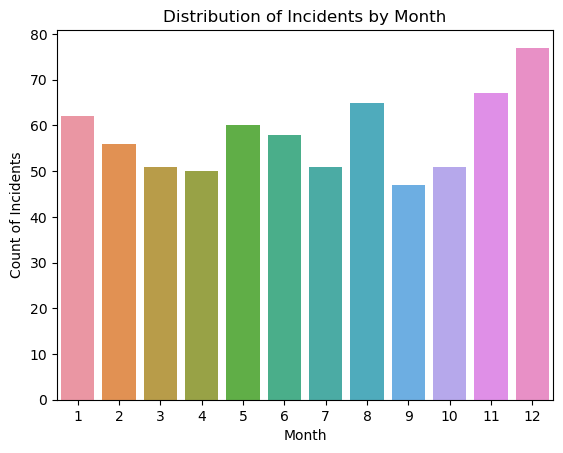

In [59]:
# Incidents by month

sns.countplot(x='MM', data=df_hechos)
plt.xlabel('Month')
plt.ylabel('Count of Incidents')
plt.title('Distribution of Incidents by Month')
plt.show()

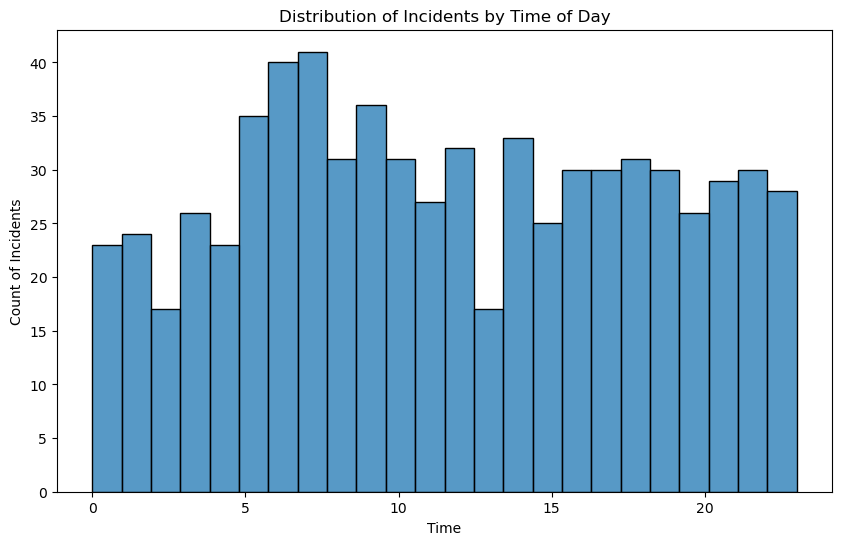

In [60]:
#Incidents by Time of Day

plt.figure(figsize=(10, 6))
sns.histplot(df_hechos['HH'], bins=24, kde=False)
plt.xlabel('Time')
plt.ylabel('Count of Incidents')
plt.title('Distribution of Incidents by Time of Day')
plt.show()


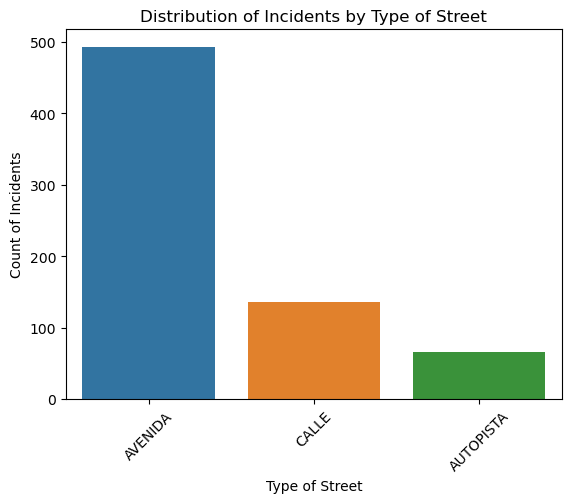

In [ ]:
# Type of Street

sns.countplot(x='TIPO_DE_CALLE', data=df_hechos)
plt.xlabel('Type of Street')
plt.ylabel('Count of Incidents')
plt.title('Distribution of Incidents by Type of Street')
plt.xticks(rotation=45)
plt.show()


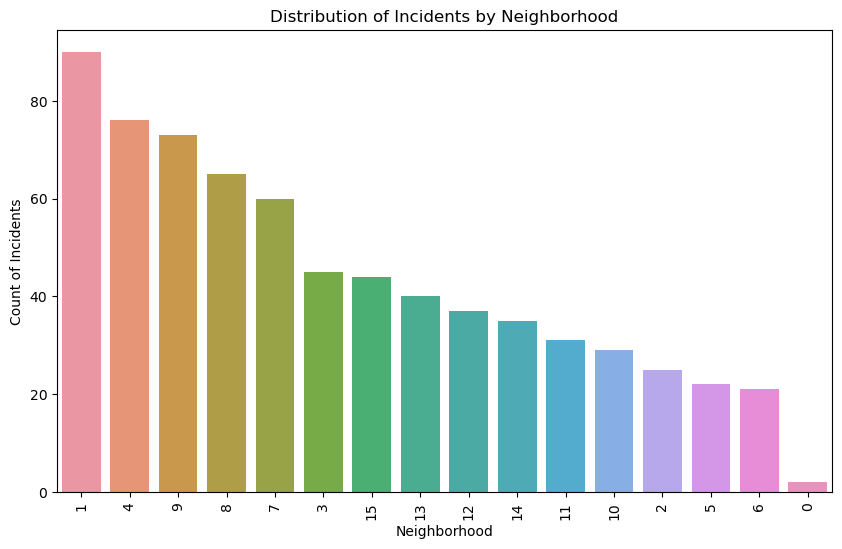

In [ ]:
# Neighborhood

plt.figure(figsize=(10, 6))
sns.countplot(x='COMUNA', data=df_hechos, order=df_hechos['COMUNA'].value_counts().index)
plt.xlabel('Neighborhood')
plt.ylabel('Count of Incidents')
plt.title('Distribution of Incidents by Neighborhood')
plt.xticks(rotation=90)
plt.show()


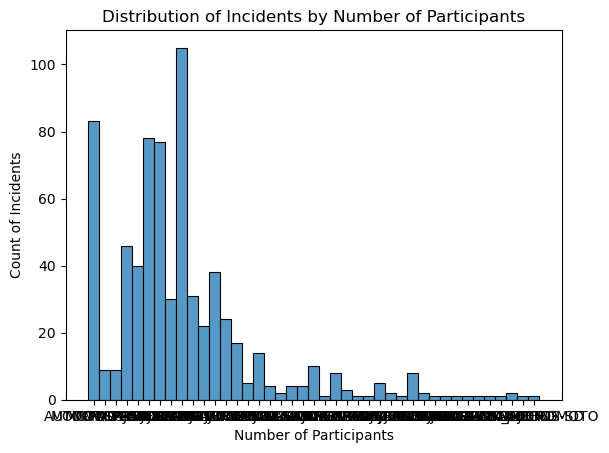

In [ ]:
# Participants

sns.histplot(df_hechos['PARTICIPANTES'], bins=20, kde=False)
plt.xlabel('Number of Participants')
plt.ylabel('Count of Incidents')
plt.title('Distribution of Incidents by Number of Participants')
plt.show()


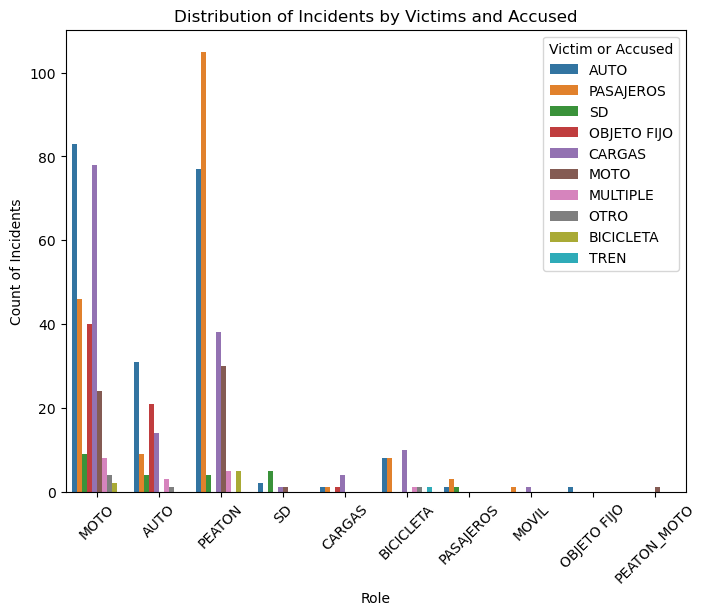

In [ ]:
#Victims and Accused

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='VICTIMA', data=df_hechos, hue='ACUSADO')
plt.xlabel('Role')
plt.ylabel('Count of Incidents')
plt.title('Distribution of Incidents by Victims and Accused')
plt.xticks(rotation=45)
plt.legend(title='Victim or Accused')
plt.show()


The following values will be visualized from the Victimas table: age, sex, victim, role

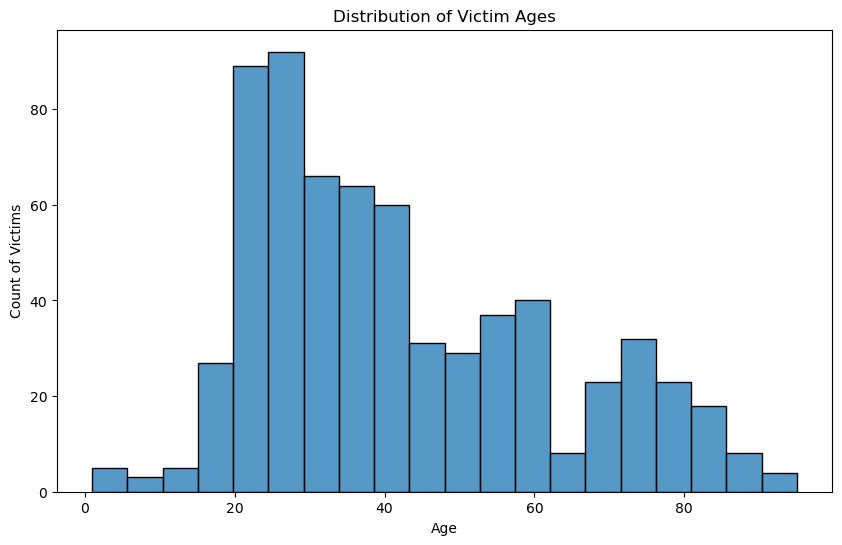

In [ ]:
# Age

df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], errors='coerce') #handle the SD values
plt.figure(figsize=(10, 6))
sns.histplot(df_victimas['EDAD'], bins=20, kde=False)
plt.xlabel('Age')
plt.ylabel('Count of Victims')
plt.title('Distribution of Victim Ages')
plt.show()


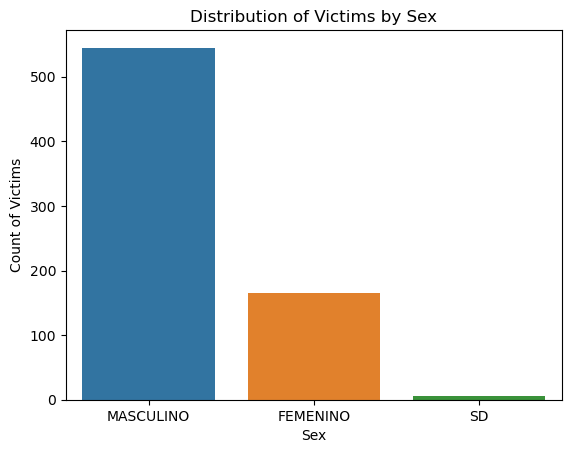

In [ ]:
# Sex

sns.countplot(x='SEXO', data=df_victimas)
plt.xlabel('Sex')
plt.ylabel('Count of Victims')
plt.title('Distribution of Victims by Sex')
plt.show()


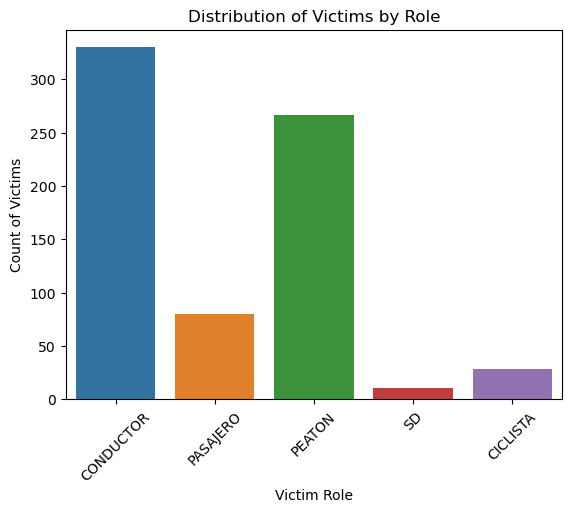

In [ ]:
# Victim Role

sns.countplot(x='ROL', data=df_victimas)
plt.xlabel('Victim Role')
plt.ylabel('Count of Victims')
plt.title('Distribution of Victims by Role')
plt.xticks(rotation=45)
plt.show()


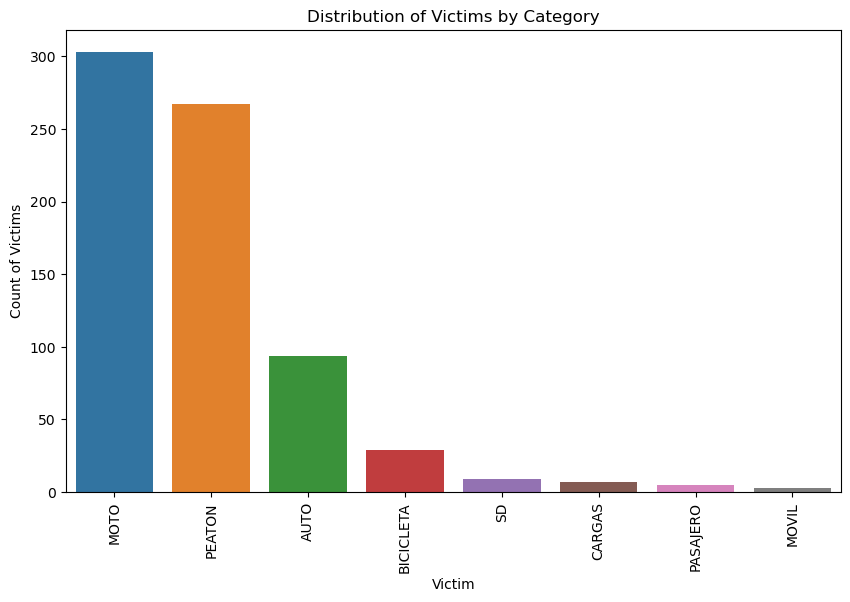

In [ ]:
# Victim

plt.figure(figsize=(10, 6))
sns.countplot(x='VICTIMA', data=df_victimas, order=df_victimas['VICTIMA'].value_counts().index)
plt.xlabel('Victim')
plt.ylabel('Count of Victims')
plt.title('Distribution of Victims by Category')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#export dataframes into new excel files
df_victimas.to_excel('victimas.xlsx', index=False)

df_hechos.to_excel('hechos.xlsx', index=False)


In [62]:
df_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,PERIODO
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,Madrugada
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AUTOPISTA,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,Madrugada
2,2016-0003,1,2016-01-03,2016,1,3,1900-01-01 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,Mañana
3,2016-0004,1,2016-01-10,2016,1,10,1900-01-01 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,Madrugada
4,2016-0005,1,2016-01-21,2016,1,21,1900-01-01 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,Mañana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,1900-01-01 17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,Noche
692,2021-0094,1,2021-12-20,2021,12,20,1900-01-01 01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,Madrugada
693,2021-0095,1,2021-12-30,2021,12,30,1900-01-01 00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,Madrugada
694,2021-0096,1,2021-12-15,2021,12,15,1900-01-01 10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,Mediodía


In [61]:
df_hechos.to_excel('hechos.xlsx', index=False)